<a href="https://colab.research.google.com/github/PaulToronto/NYC---Taxi-and-Limousine-Commission/blob/main/High_Volume_For_Hire_Vehicle_Trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High Volume For-Hire Vehicle Trips

## Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import gdown

## Functions

In [2]:
get_data_url = lambda id: rf'https://drive.google.com/uc?id={id}'
gdown_download = lambda id, file_name: gdown.download(get_data_url(id), file_name, quiet=False)

## EDA

In [3]:
id = '1rEgVTd1wkF7R5jScMqwAIaX9Fm4w-JzO'
file_name = 'fhv_hv_july_2024.parquet'
gdown_download(id, file_name)

trips = pd.read_parquet(file_name)

Downloading...
From (original): https://drive.google.com/uc?id=1rEgVTd1wkF7R5jScMqwAIaX9Fm4w-JzO
From (redirected): https://drive.google.com/uc?id=1rEgVTd1wkF7R5jScMqwAIaX9Fm4w-JzO&confirm=t&uuid=aab065f8-1cbf-4f5a-b2b6-f1ad057be7d8
To: /content/fhv_hv_july_2024.parquet
100%|██████████| 468M/468M [00:03<00:00, 149MB/s]


In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19182934 entries, 0 to 19182933
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [5]:
trips.isnull().sum()

,0
hvfhs_license_num,0
dispatching_base_num,0
originating_base_num,4836446
request_datetime,0
on_scene_datetime,4836446
pickup_datetime,0
dropoff_datetime,0
PULocationID,0
DOLocationID,0
trip_miles,0


In [6]:
trips.shape

(19182934, 24)

In [7]:
trips.describe(exclude=['object', 'datetime64']).apply(lambda s: s.apply('{0:.2f}'.format))

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00,19182934.00
mean,137.92,141.72,5.15,1180.32,25.65,1.18,0.72,2.17,1.03,0.22,1.13,19.77
std,74.63,77.64,5.98,829.31,22.69,4.03,0.65,1.85,1.32,0.72,3.40,16.98
min,1.00,1.00,0.00,0.00,-32.85,0.00,0.00,0.00,0.00,0.00,0.00,-33.88
25%,75.00,75.00,1.61,603.00,12.45,0.00,0.34,1.03,0.00,0.00,0.00,8.84
50%,138.00,140.00,3.10,968.00,19.19,0.00,0.53,1.65,0.00,0.00,0.00,14.78
75%,208.00,215.00,6.49,1518.00,30.61,0.00,0.86,2.65,2.75,0.00,0.00,24.84
max,265.00,265.00,350.85,42478.00,1399.74,87.06,39.09,116.16,2.75,7.25,274.64,1167.03


In [8]:
trips.describe(include='datetime64')

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime
count,19182934,14346488,19182934,19182934
mean,2024-07-16 18:52:33.446040,2024-07-16 19:37:40.087136,2024-07-16 18:56:56.480801,2024-07-16 19:16:36.800751
min,2024-06-30 22:40:00,2024-06-30 22:37:28,2024-07-01 00:00:00,2024-07-01 00:01:52
25%,2024-07-09 12:19:37,2024-07-09 14:36:30,2024-07-09 12:23:48.250000,2024-07-09 12:45:23
50%,2024-07-16 19:37:30,2024-07-16 20:39:14,2024-07-16 19:41:56,2024-07-16 20:01:00
75%,2024-07-24 10:00:54,2024-07-24 09:24:02,2024-07-24 10:04:35,2024-07-24 10:25:22
max,2024-08-01 00:00:00,2024-07-31 23:59:57,2024-07-31 23:59:59,2024-08-01 06:26:24


In [9]:
trips.describe(include='object')

,hvfhs_license_num,dispatching_base_num,originating_base_num,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
count,19182934,19182934,14346488,19182934,19182934,19182934,19182934,19182934
unique,2,2,6,2,2,2,2,2
top,HV0003,B03404,B03404,N,N,N,N,N
freq,14328764,14328764,14328717,18505710,18899871,19162680,19127664,17470110


### `hvfhs_license_num`

The TLC license number of the HVFHS base or business
As of September 2019, the HVFHS licensees are the following:

- HV0002: Juno
- HV0003: Uber
- HV0004: Via
- HV0005: Lyft

In [10]:
trips['hvfhs_license_num'].value_counts(dropna=False)

,count
hvfhs_license_num,
HV0003,14328764
HV0005,4854170


### `dispatching_base_num`

The TLC Base License Number of the base that dispatched the trip

In [11]:
trips['dispatching_base_num'].unique()

array(['B03404', 'B03406'], dtype=object)

In [12]:
trips[['hvfhs_license_num', 'dispatching_base_num']].value_counts(dropna=False)

,,count
hvfhs_license_num,dispatching_base_num,
HV0003,B03404,14328764
HV0005,B03406,4854170


### `originating_base_num`

Base number of the base that received the original trip request

In [13]:
trips['originating_base_num'].value_counts(dropna=False)

,count
originating_base_num,
B03404,14328717
None,4836446
B03406,17718
B03153,27
B02026,19
B03380,6
B00887,1


In [14]:
trips[['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num']].value_counts(dropna=False)

hvfhs_license_num  dispatching_base_num  originating_base_num
HV0003             B03404                B03404                  14328717
HV0005             B03406                NaN                      4836446
                                         B03406                     17718
HV0003             B03404                B03153                        27
                                         B02026                        19
HV0005             B03406                B03380                         6
HV0003             B03404                B00887                         1
Name: count, dtype: int64

### `request_datetime`

Date/time when passenger requested to be picked up

In [15]:
trips['request_datetime'].isnull().sum()

0

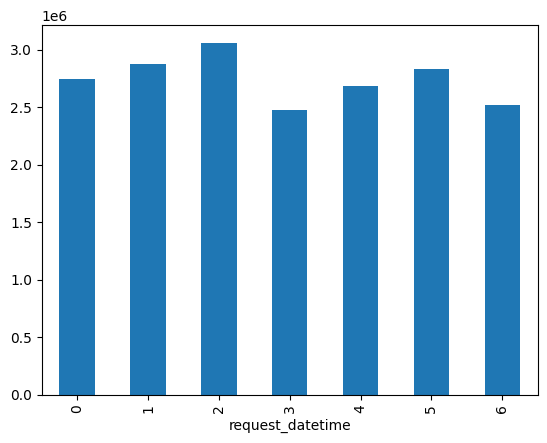

In [16]:
# Week starts Monday = 0
trips['request_datetime'].dt.day_of_week.value_counts(dropna=False).sort_index().plot.bar();

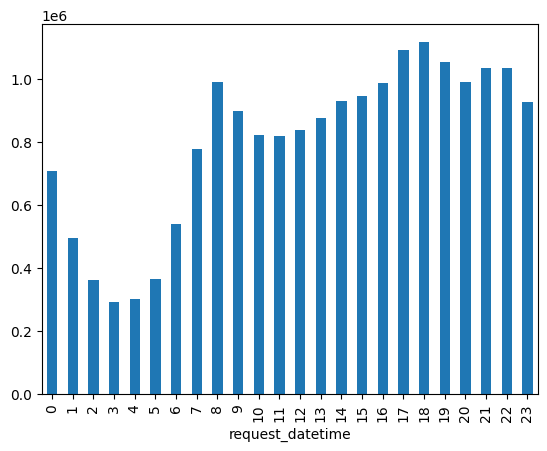

In [17]:
trips['request_datetime'].dt.hour.value_counts(dropna=False).sort_index().plot.bar();

### `on_scene_datetime`      

Date/time when driver arrived at the pick-up location (Accessible
Vehicles-only)

In [18]:
trips['on_scene_datetime'].isnull().sum()

4836446

### `pickup_datetime`        

The date and time of the trip pick-up

In [19]:
trips['pickup_datetime'].isnull().sum()

0

### `dropoff_datetime`

The date and time of the trip drop-off

In [20]:
trips['dropoff_datetime'].isnull().sum()

0

### `PULocationID`        

The date and time of the trip pick-up

In [21]:
len(trips['PULocationID'].unique())

262

### `DOLocationID`

The date and time of the trip drop-off

In [22]:
len(trips['DOLocationID'].unique())

262

### `trip_miles`             

Total miles for passenger trip

In [23]:
trips['trip_miles'].min(), trips['trip_miles'].max()

(0.0, 350.85)

In [24]:
len(trips[trips['trip_miles'] == 0])

2479

### `trip_time`

Total time in seconds for passenger trip
          

In [25]:
trips['trip_time'].min(), trips['trip_time'].max()

(0, 42478)

In [26]:
trips[trips['trip_time'] == 0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
4420242,HV0003,B03404,B03404,2024-07-08 18:28:17,2024-07-08 18:29:29,2024-07-08 18:29:29,2024-07-08 18:29:29,143,143,0.0,...,0.51,2.75,0.0,0.0,5.39,N,N,N,N,N
9925114,HV0003,B03404,B03404,2024-07-17 11:25:00,2024-07-17 10:54:26,2024-07-17 10:54:26,2024-07-17 10:54:26,26,26,0.0,...,0.64,0.00,0.0,0.0,0.00,N,N,N,N,N
18159994,HV0003,B03404,B03404,2024-07-30 10:10:00,2024-07-30 09:38:44,2024-07-30 09:38:44,2024-07-30 09:38:44,169,169,0.0,...,0.64,0.00,0.0,0.0,1.63,N,N,N,N,Y
18892772,HV0003,B03404,B03404,2024-07-31 15:40:00,2024-07-31 15:22:03,2024-07-31 15:22:03,2024-07-31 15:22:03,149,149,0.0,...,0.94,0.00,0.0,0.0,0.00,N,N,N,N,N


### `base_passenger_fare`

Base passenger fare before tolls, tips, taxes, and fees

In [27]:
trips['base_passenger_fare'].min(), trips['base_passenger_fare'].max()

(-32.85, 1399.74)

In [28]:
len(trips[trips['base_passenger_fare'] == 0])

196

In [29]:
len(trips[trips['base_passenger_fare'] < 0])

437

### `tolls`

Total amount of all tolls paid in trip

In [30]:
trips['tolls'].min(), trips['tolls'].max()

(0.0, 87.06)

### `bcf`

Total amount collected in trip for Black Car Fund


In [31]:
trips['bcf'].min(), trips['bcf'].max()

(0.0, 39.09)

### `sales_tax`

Total amount collected in trip for NYS sales tax


In [32]:
trips['sales_tax'].min(), trips['sales_tax'].max()

(0.0, 116.16)

### `congestion_surcharge`

Total amount collected in trip for NYS congestion surcharge


In [33]:
trips['congestion_surcharge'].value_counts(dropna=False)

,count
congestion_surcharge,
0.00,11847450
2.75,7083651
0.75,251833


### `airport_fee`

$2.50 for both drop off and pick up at LaGuardia, Newark, and John F. Kennedy airports


In [34]:
trips['airport_fee'].value_counts(dropna=False)

,count
airport_fee,
0.00,17468069
2.50,1675329
1.25,25518
5.00,13338
1.00,630
4.75,18
7.25,16
0.50,10
3.75,2


### `tips`

Total amount of tips received from passenger


In [35]:
trips['tips'].min(), trips['tips'].max()

(0.0, 274.64)

### `driver_pay`

Total driver pay (not including tolls or tips and net of commission surcharges, or taxes)


In [36]:
trips['driver_pay'].min(), trips['driver_pay'].max()

(-33.88, 1167.03)

In [37]:
len(trips[trips['driver_pay'] < 0])

37

### `shared_request_flag`       

Did the passenger agree to a shared/pooled ride, regardless of whether they were matched? (Y/N)

In [38]:
trips['shared_request_flag'].value_counts(dropna=False)

,count
shared_request_flag,
N,18505710
Y,677224


### `shared_match_flag`         

Did the passenger share the vehicle with another passenger who booked separately at any point during the trip? (Y/N)

In [39]:
trips['shared_match_flag'].value_counts(dropna=False)

,count
shared_match_flag,
N,18899871
Y,283063


### `access_a_ride_flag`           

Was the trip administered on behalf of the Metropolitan Transportation Authority (MTA)? (Y/N)

In [40]:
trips['access_a_ride_flag'].value_counts(dropna=False)

,count
access_a_ride_flag,
N,19162680
Y,20254


### `wav_request_flag`

Did the passenger request a wheelchair-accessible vehicle (WAV)? (Y/N)

In [41]:
trips['wav_request_flag'].value_counts(dropna=False)

,count
wav_request_flag,
N,19127664
Y,55270


### `wav_match_flag`

Did the trip occur in a wheelchair-accessible vehicle (WAV)? (Y/N)

In [42]:
trips['wav_match_flag'].value_counts(dropna=False)

,count
wav_match_flag,
N,17470110
Y,1712824
